<a href="https://colab.research.google.com/github/RaianaSeixas/0_paper_one_revisited/blob/main/CEC14/I_Frannk/Fix_I_Frannk_F25_cec2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
############################### DADOS DE ENTRADA 
function_select = 'F25'  

RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=1000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100
mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão
fator = 1.0/3.0; 
mut2=0.5;crossp2=0.5;mut3=0.75;crossp3=0.25;mut4=0.25;crossp4=0.25;
CR_interval = [0.25,0.75]
F_interval = [0.25,0.75]
mut_best  =0.5 ; crossp_best =0.5
#pop_split = [400,100,80]
#run_split = [100,200,500]

pop_split = [100,100,100]
run_split = [333,333,334]

In [2]:

problem_size = 30 # possibles 2, 10, 20, 30, 50, 100

In [3]:
'''
# Where you need to make changes in this code.... ps: if you search =cool= the code will find these lines !!    
      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_best.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)
     
      X3,BEST3,FOBEST,XY,BEST_XY=Rand_DE.de(bounds,  F_interval , CR_interval, NPAR3, its,fobj,X3)
      
      X4,BEST4,FOBEST,XY,BEST_XY=Rand_DE.de(bounds, mut4, crossp4,NPAR4, its,fobj,X4)
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)
'''

'\n# Where you need to make changes in this code.... ps: if you search =cool= the code will find these lines !!    \n      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_best.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)\n     \n      X3,BEST3,FOBEST,XY,BEST_XY=Rand_DE.de(bounds,  F_interval , CR_interval, NPAR3, its,fobj,X3)\n      \n      X4,BEST4,FOBEST,XY,BEST_XY=Rand_DE.de(bounds, mut4, crossp4,NPAR4, its,fobj,X4)\n      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)\n'

In [4]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
import Go2Ann
import Rand_DE
import de_bounds_best
from pandas import read_csv

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 397 (delta 46), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (397/397), 335.23 KiB | 1.08 MiB/s, done.
Resolving deltas: 100% (227/227), done.
/content/optim_raianars_Insight


In [5]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 277 (delta 83), reused 142 (delta 82), pack-reused 129
Receiving objects: 100% (277/277), 667.30 KiB | 5.61 MiB/s, done.
Resolving deltas: 100% (155/155), done.
/content/optim_raianars_Insight/Raianars_paper_One


In [6]:
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

In [7]:
def load_shift_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values.reshape((-1))

def load_matrix_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values

In [8]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 397 (delta 46), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (397/397), 335.23 KiB | 4.04 MiB/s, done.
Resolving deltas: 100% (227/227), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight


In [9]:
!git clone https://github.com/ucfilho/Raianars_Routines #clonar do Github
%cd Raianars_Routines

Cloning into 'Raianars_Routines'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 77 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (77/77), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines


In [10]:
!git clone https://github.com/ucfilho/functions_cec2014_data
%cd functions_cec2014_data
import F1_to_F27_cec2014_zero_to_hero
import cec2014_names
import cec2014_shift_rotate

Cloning into 'functions_cec2014_data'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 300 (delta 182), reused 290 (delta 178), pack-reused 3
Receiving objects: 100% (300/300), 466.45 KiB | 1.05 MiB/s, done.
Resolving deltas: 100% (182/182), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data


In [11]:
dim = problem_size 

In [12]:
!pip install --upgrade --no-cache-dir gdown

In [13]:
# !gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
# https://drive.google.com/file/d/1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz/view?usp=sharing
!gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
To: /content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/cec2014.zip
100% 36.1M/36.1M [00:00<00:00, 253MB/s]


In [14]:
import zipfile
file_name = zipfile.ZipFile('cec2014.zip', 'r')
file_name.extractall()

In [15]:

Function_CEC2014 =function_select + "_" + cec2014_names.NamesFunctions()[function_select]+"_D_"+str(problem_size)

f_matrix = "M_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shift_data_file="shift_data_"+function_select[1:]+".txt"
shift_data = load_shift_data__(shift_data_file)[:problem_size]
matrix = load_matrix_data__(f_matrix)
f_shuffle = "shuffle_data_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shuffle = (load_shift_data__(f_shuffle)[:problem_size] - np.ones(problem_size)).astype(int)

if(function_select=='F17'):
  f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__ 


  def F17(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      problem_size = len(solution)
      p = np.array([0.3, 0.3, 0.4])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))

      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1+n2)]
      idx3 = shuffle[(n1+n2):]
      mz = np.dot(solution - shift_data, matrix)
      return f9_modified_schwefel__(mz[idx1]) + f8_rastrigin__(mz[idx2]) + f1_elliptic__(mz[idx3]) #+ bias

  Function = F17

if(function_select=='F18'):
  f2_bent_cigar__ = F1_to_F27_cec2014_zero_to_hero.f2_bent_cigar__
  f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__ 

  def F18(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      problem_size = len(solution)
      p = np.array([0.3, 0.3, 0.4])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))

      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1 + n2)]
      idx3 = shuffle[(n1 + n2):]
      mz = np.dot(solution - shift_data, matrix)
      return f2_bent_cigar__(mz[idx1]) + f12_hgbat__(mz[idx2]) + f8_rastrigin__(mz[idx3]) #+ bias

  Function = F18

if(function_select=='F19'):

  f6_weierstrass__ = F1_to_F27_cec2014_zero_to_hero.f6_weierstrass__
  f4_rosenbrock__ = F1_to_F27_cec2014_zero_to_hero.f4_rosenbrock__
  f7_griewank__ = F1_to_F27_cec2014_zero_to_hero.f7_griewank__
  f14_expanded_scaffer__ = F1_to_F27_cec2014_zero_to_hero.f14_expanded_scaffer__


  def F19(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      problem_size = len(solution)
      p = np.array([0.2, 0.2, 0.3, 0.3])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))
      n3 = int(np.ceil(p[2] * problem_size))

      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1 + n2)]
      idx3 = shuffle[(n1 + n2):(n1+n2+n3)]
      idx4 = shuffle[n1+n2+n3:]
      mz = np.dot(solution - shift_data, matrix)
      return f7_griewank__(mz[idx1]) + f6_weierstrass__(mz[idx2]) + f4_rosenbrock__(mz[idx3]) + f14_expanded_scaffer__(mz[idx4]) 

  Function = F19

if(function_select=='F20'):
  f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__
  f3_discus__ = F1_to_F27_cec2014_zero_to_hero.f3_discus__
  f13_expanded_griewank__ = F1_to_F27_cec2014_zero_to_hero.f13_expanded_griewank__
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__

  def F20(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      problem_size = len(solution)
      p = np.array([0.2, 0.2, 0.3, 0.3])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))
      n3 = int(np.ceil(p[2] * problem_size))

      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1 + n2)]
      idx3 = shuffle[(n1 + n2):(n1 + n2 + n3)]
      idx4 = shuffle[n1 + n2 + n3:]
      mz = np.dot(solution - shift_data, matrix)
      return f12_hgbat__(mz[idx1]) + f3_discus__(mz[idx2]) + f13_expanded_griewank__(mz[idx3]) + f8_rastrigin__(mz[idx4])# + bias

  Function = F20

if(function_select=='F21'):

  f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__ 
  f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__ 
  f14_expanded_scaffer__ = F1_to_F27_cec2014_zero_to_hero.f14_expanded_scaffer__  
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
  f4_rosenbrock__ = F1_to_F27_cec2014_zero_to_hero.f4_rosenbrock__

  def F21(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
    problem_size = len(solution)
    p = np.array([0.1, 0.2, 0.2, 0.2, 0.3])
    n1 = int(np.ceil(p[0] * problem_size))
    n2 = int(np.ceil(p[1] * problem_size))
    n3 = int(np.ceil(p[2] * problem_size))
    n4 = int(np.ceil(p[3] * problem_size))

    idx1 = shuffle[:n1]
    idx2 = shuffle[n1:(n1 + n2)]
    idx3 = shuffle[(n1 + n2):(n1 + n2 + n3)]
    idx4 = shuffle[(n1+n2+n3):(n1+n2+n3+n4)]
    idx5 = shuffle[n1+n2+n3+n4:]
    mz = np.dot(solution - shift_data, matrix)

    return f14_expanded_scaffer__(mz[idx1]) + f12_hgbat__(mz[idx2]) + f4_rosenbrock__(mz[idx3]) + \
           f9_modified_schwefel__(mz[idx4]) + f1_elliptic__(mz[idx5]) 


  Function = F21

if(function_select=='F22'):

  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
  f10_katsuura__ = F1_to_F27_cec2014_zero_to_hero.f10_katsuura__ 
  f11_happy_cat__ = F1_to_F27_cec2014_zero_to_hero.f11_happy_cat__
  f13_expanded_griewank__ = F1_to_F27_cec2014_zero_to_hero.f13_expanded_griewank__
  f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__
  f5_ackley__ = F1_to_F27_cec2014_zero_to_hero.f5_ackley__

  def F22(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      problem_size = len(solution)
      p = np.array([0.1, 0.2, 0.2, 0.2, 0.3])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))
      n3 = int(np.ceil(p[2] * problem_size))
      n4 = int(np.ceil(p[3] * problem_size))

      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1 + n2)]
      idx3 = shuffle[(n1 + n2):(n1 + n2 + n3)]
      idx4 = shuffle[(n1 + n2 + n3):(n1 + n2 + n3 + n4)]
      idx5 = shuffle[n1 + n2 + n3 + n4:]
      mz = np.dot(solution - shift_data, matrix)
      
      return f10_katsuura__(mz[idx1]) + f11_happy_cat__(mz[idx2]) + f13_expanded_griewank__(mz[idx3]) + \
            f9_modified_schwefel__(mz[idx4]) + f5_ackley__(mz[idx5]) #+ bias

  Function = F22

if(function_select=='F23'):
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
  f2_bent_cigar__ = F1_to_F27_cec2014_zero_to_hero.f2_bent_cigar__ 
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__ 
  f3_discus__ = F1_to_F27_cec2014_zero_to_hero.f3_discus__
  f4_rosenbrock__   =  F1_to_F27_cec2014_zero_to_hero.f4_rosenbrock__


  def F23(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
    problem_size = len(solution)
    xichma = np.array([10, 20, 30, 40, 50])
    lamda = np.array([1, 1e-6, 1e-26, 1e-6, 1e-6])
    bias = np.array([0, 100, 200, 300, 400])

      
    # 1. Rotated Rosenbrock’s Function F4’
    t1 = solution - shift_data[0]
    g1 = lamda[0] * f4_rosenbrock__(np.dot(t1, matrix[:problem_size, :])) + bias[0]
    w1 = (1.0 / np.sqrt(sum(t1 ** 2))) * np.exp(-sum(t1 ** 2) / (2 * problem_size * xichma[0] ** 2))

    # 2. High Conditioned Elliptic Function F1’
    t2 = solution - shift_data[1]
    g2 = lamda[1] * f1_elliptic__(solution) + bias[1]
    w2 = (1.0 / np.sqrt(sum(t2 ** 2))) * np.exp(-sum(t2 ** 2) / (2 * problem_size * xichma[1] ** 2))
    # 3. Rotated Bent Cigar Function F2’
    t3 = solution - shift_data[2]
    g3 = lamda[2] * f2_bent_cigar__(np.dot(matrix[2 * problem_size: 3 * problem_size, :], t3)) + bias[2]
    w3 = (1.0 / np.sqrt(sum(t3 ** 2))) * np.exp(-sum(t3 ** 2) / (2 * problem_size * xichma[2] ** 2))
    # 4. Rotated Discus Function F3’
    t4 = solution - shift_data[3]
    g4 = lamda[3] * f3_discus__(np.dot(matrix[3 * problem_size: 4 * problem_size, :], t4)) + bias[3]
    w4 = (1.0 / np.sqrt(sum(t4 ** 2))) * np.exp(-sum(t4 ** 2) / (2 * problem_size * xichma[3] ** 2))

    # 4. High Conditioned Elliptic Function F1’
    t5 = solution - shift_data[4]
    g5 = lamda[4] * f1_elliptic__(solution) + bias[4]
    w5 = (1.0 / np.sqrt(sum(t5 ** 2))) * np.exp(-sum(t5 ** 2) / (2 * problem_size * xichma[4] ** 2))

    sw = sum([w1, w2, w3, w4, w5])
    result = (w1 * g1 + w2 * g2 + w3 * g3 + w4 * g4 + w5 * g5) / sw
    return result #+ f_bias

  Function = F23


if(function_select=='F24'):
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
  f2_bent_cigar__ = F1_to_F27_cec2014_zero_to_hero.f2_bent_cigar__ 
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__ 
  f3_discus__ = F1_to_F27_cec2014_zero_to_hero.f3_discus__
  f4_rosenbrock__   =  F1_to_F27_cec2014_zero_to_hero.f4_rosenbrock__
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
  f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__ 
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__ 
  f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__

  def F24(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      problem_size = len(solution)
      xichma = np.array([20, 20, 20])
      lamda = np.array([1, 1, 1])
      bias = np.array([0, 100, 200])

      # 1. Rotated Rosenbrock’s Function F4’
      t1 = solution - shift_data[0]
      g1 = lamda[0] * f9_modified_schwefel__(solution) + bias[0]
      w1 = (1.0 / np.sqrt(sum(t1 ** 2))) * np.exp(-sum(t1 ** 2) / (2 * problem_size * xichma[0] ** 2))

      # 2. Rotated Rastrigin’s Function F9’
      t2 = solution - shift_data[1]
      g2 = lamda[1] * f8_rastrigin__(np.dot(matrix[problem_size: 2 * problem_size], t2)) + bias[1]
      w2 = (1.0 / np.sqrt(sum(t2 ** 2))) * np.exp(-sum(t2 ** 2) / (2 * problem_size * xichma[1] ** 2))

      # 3. Rotated HGBat Function F14’
      t3 = solution - shift_data[2]
      g3 = lamda[2] * f12_hgbat__(np.dot(matrix[2 * problem_size: 3 * problem_size, :], t3)) + bias[2]
      w3 = (1.0 / np.sqrt(sum(t3 ** 2))) * np.exp(-sum(t3 ** 2) / (2 * problem_size * xichma[2] ** 2))

      sw = sum([w1, w2, w3])
      result = (w1 * g1 + w2 * g2 + w3 * g3) / sw
      return result #+ f_bias

  Function = F24

 
if(function_select=='F25'):

  f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__ 
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__ 
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__

  def F25(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      problem_size = len(solution)
      xichma = np.array([10, 30, 50])
      lamda = np.array([0.25, 1, 1e-7])
      bias = np.array([0, 100, 200])

      # 1. Rotated Schwefel's Function F11’
      t1 = solution - shift_data[0]
      g1 = lamda[0] * f9_modified_schwefel__(np.dot(matrix[:problem_size, :problem_size], t1)) + bias[0]
      w1 = (1.0 / np.sqrt(sum(t1 ** 2))) * np.exp(-sum(t1 ** 2) / (2 * problem_size * xichma[0] ** 2))

      # 2. Rotated Rastrigin’s Function F9’
      t2 = solution - shift_data[1]
      g2 = lamda[1] * f8_rastrigin__(np.dot(matrix[problem_size: 2 * problem_size], t2)) + bias[1]
      w2 = (1.0 / np.sqrt(sum(t2 ** 2))) * np.exp(-sum(t2 ** 2) / (2 * problem_size * xichma[1] ** 2))

      # 3. Rotated High Conditioned Elliptic Function F1'
      t3 = solution - shift_data[2]
      g3 = lamda[2] * f1_elliptic__(np.dot(matrix[2 * problem_size: 3 * problem_size, :], t3)) + bias[2]
      w3 = (1.0 / np.sqrt(sum(t3 ** 2))) * np.exp(-sum(t3 ** 2) / (2 * problem_size * xichma[2] ** 2))

      sw = sum([w1, w2, w3])
      result = (w1 * g1 + w2 * g2 + w3 * g3) / sw
      return result #+ f_bias

  Function = F25   

if(function_select=='F26'):

  f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__ 
  f11_happy_cat__ = F1_to_F27_cec2014_zero_to_hero.f11_happy_cat__
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
  f6_weierstrass__ = F1_to_F27_cec2014_zero_to_hero.f6_weierstrass__
  f7_griewank__ = F1_to_F27_cec2014_zero_to_hero.f7_griewank__

  def F26(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
    problem_size = len(solution)
    xichma = np.array([10, 10, 10, 10, 10])
    lamda = np.array([0.25, 1, 1e-7, 2.5, 10])
    bias = np.array([0, 100, 200, 300, 400])

    # 1. Rotated Schwefel's Function F11’
    t1 = solution - shift_data[0]
    g1 = lamda[0] * f9_modified_schwefel__(np.dot(matrix[:problem_size, :], t1)) + bias[0]
    w1 = (1.0 / np.sqrt(sum(t1 ** 2))) * np.exp(-sum(t1 ** 2) / (2 * problem_size * xichma[0] ** 2))

    # 2. Rotated HappyCat Function F13’
    t2 = solution - shift_data[1]
    g2 = lamda[1] * f11_happy_cat__(np.dot(matrix[problem_size:2 * problem_size, :], t2)) + bias[1]
    w2 = (1.0 / np.sqrt(sum(t2 ** 2))) * np.exp(-sum(t2 ** 2) / (2 * problem_size * xichma[1] ** 2))

    # 3. Rotated High Conditioned Elliptic Function F1’
    t3 = solution - shift_data[2]
    g3 = lamda[2] * f1_elliptic__(np.dot(matrix[2 * problem_size: 3 * problem_size, :], t3)) + bias[2]
    w3 = (1.0 / np.sqrt(sum(t3 ** 2))) * np.exp(-sum(t3 ** 2) / (2 * problem_size * xichma[2] ** 2))

    # 4. Rotated Weierstrass Function F6’
    t4 = solution - shift_data[3]
    g4 = lamda[3] * f6_weierstrass__(np.dot(matrix[3 * problem_size: 4 * problem_size, :], t4)) + bias[3]
    w4 = (1.0 / np.sqrt(sum(t4 ** 2))) * np.exp(-sum(t4 ** 2) / (2 * problem_size * xichma[3] ** 2))

    # 5. Rotated Griewank’s Function F7’
    t5 = solution - shift_data[4]
    g5 = lamda[4] * f7_griewank__(np.dot(matrix[4*problem_size:, :], t5)) + bias[4]
    w5 = (1.0 / np.sqrt(sum(t5 ** 2))) * np.exp(-sum(t5 ** 2) / (2 * problem_size * xichma[4] ** 2))

    sw = sum([w1, w2, w3, w4, w5])
    result = (w1 * g1 + w2 * g2 + w3 * g3 + w4 * g4 + w5 * g5) / sw
    return result #+ f_bias

  Function = F26

if(function_select=='F27'):

  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
  f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__ 
  f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__
  f6_weierstrass__ = F1_to_F27_cec2014_zero_to_hero.f6_weierstrass__

  def F27(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      problem_size = len(solution)
      xichma = np.array([10, 10, 10, 20, 20])
      lamda = np.array([10, 10, 2.5, 25, 1e-6])
      bias = np.array([0, 100, 200, 300, 400])

      # 1. Rotated HGBat Function F14'
      t1 = solution - shift_data[0]
      g1 = lamda[0] * f12_hgbat__(np.dot(matrix[:problem_size, :], t1)) + bias[0]
      w1 = (1.0 / np.sqrt(sum(t1 ** 2))) * np.exp(-sum(t1 ** 2) / (2 * problem_size * xichma[0] ** 2))

      # 2. Rotated Rastrigin’s Function F9’
      t2 = solution - shift_data[1]
      g2 = lamda[1] * f8_rastrigin__(np.dot(matrix[problem_size:2 * problem_size, :], t2)) + bias[1]
      w2 = (1.0 / np.sqrt(sum(t2 ** 2))) * np.exp(-sum(t2 ** 2) / (2 * problem_size * xichma[1] ** 2))

      # 3. Rotated Schwefel's Function F11’
      t3 = solution - shift_data[2]
      g3 = lamda[2] * f9_modified_schwefel__(np.dot(matrix[2 * problem_size: 3 * problem_size, :], t3)) + bias[2]
      w3 = (1.0 / np.sqrt(sum(t3 ** 2))) * np.exp(-sum(t3 ** 2) / (2 * problem_size * xichma[2] ** 2))

      # 4. Rotated Weierstrass Function F6’
      t4 = solution - shift_data[3]
      g4 = lamda[3] * f6_weierstrass__(np.dot(matrix[3 * problem_size: 4 * problem_size, :], t4)) + bias[3]
      w4 = (1.0 / np.sqrt(sum(t4 ** 2))) * np.exp(-sum(t4 ** 2) / (2 * problem_size * xichma[3] ** 2))

      # 5. Rotated High Conditioned Elliptic Function F1’
      t5 = solution - shift_data[4]
      g5 = lamda[4] * f1_elliptic__(np.dot(matrix[4 * problem_size:, :], t5)) + bias[4]
      w5 = (1.0 / np.sqrt(sum(t5 ** 2))) * np.exp(-sum(t5 ** 2) / (2 * problem_size * xichma[4] ** 2))

      sw = sum([w1, w2, w3, w4, w5])
      result = (w1 * g1 + w2 * g2 + w3 * g3 + w4 * g4 + w5 * g5) / sw
      return result #+ f_bias

  Function = F27 

if(function_select=='F28'):

  # block of functions to F28: it use F17 and F19
  f_matrix = "M_15"+"_D"+str(problem_size) + ".txt"
  matrix_F15 = load_matrix_data__(f_matrix)

  f14_expanded_scaffer__ = F1_to_F27_cec2014_zero_to_hero.f14_expanded_scaffer__ 
  f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__ 
  f11_happy_cat__ = F1_to_F27_cec2014_zero_to_hero.f11_happy_cat__ 
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
  f13_expanded_griewank__ = F1_to_F27_cec2014_zero_to_hero.f13_expanded_griewank__

  def F15_hybrid(solution , shift_data = shift_data, matrix = matrix_F15 , shuffle = shuffle):
      problem_size = len(solution)
      z = 5 * (solution - shift_data) / 100
      z = np.dot(z, matrix) + 1
      return f13_expanded_griewank__(z) #+ bias

  def F28(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      problem_size = len(solution)
      xichma = np.array([10, 20, 30, 40, 50])
      lamda = np.array([2.5, 10, 2.5, 5e-4, 1e-6])
      bias = np.array([0, 100, 200, 300, 400])

      # 1. Rotated Expanded Griewank’s plus Rosenbrock’s Function F15’
      t1 = solution - shift_data[0]
      g1 = lamda[0] * F15_hybrid(solution) + bias[0]
      w1 = (1.0 / np.sqrt(sum(t1 ** 2))) * np.exp(-sum(t1 ** 2) / (2 * problem_size * xichma[0] ** 2))

      # 2. Rotated HappyCat Function F13’
      t2 = solution - shift_data[1]
      g2 = lamda[1] * f11_happy_cat__(np.dot(matrix[problem_size:2 * problem_size, :], t2)) + bias[1]
      w2 = (1.0 / np.sqrt(sum(t2 ** 2))) * np.exp(-sum(t2 ** 2) / (2 * problem_size * xichma[1] ** 2))

      # 3. Rotated Schwefel's Function F11’
      t3 = solution - shift_data[2]
      g3 = lamda[2] * f9_modified_schwefel__(np.dot(matrix[2 * problem_size: 3 * problem_size, :], t3)) + bias[2]
      w3 = (1.0 / np.sqrt(sum(t3 ** 2))) * np.exp(-sum(t3 ** 2) / (2 * problem_size * xichma[2] ** 2))

      # 4. Rotated Expanded Scaffer’s F6 Function F16’
      t4 = solution - shift_data[3]
      g4 = lamda[3] * f14_expanded_scaffer__(np.dot(matrix[3 * problem_size: 4 * problem_size, :], t4)) + bias[3]
      w4 = (1.0 / np.sqrt(sum(t4 ** 2))) * np.exp(-sum(t4 ** 2) / (2 * problem_size * xichma[3] ** 2))

      # 5. Rotated High Conditioned Elliptic Function F1’
      t5 = solution - shift_data[4]
      g5 = lamda[4] * f1_elliptic__(np.dot(matrix[4 * problem_size:, :], t5)) + bias[4]
      w5 = (1.0 / np.sqrt(sum(t5 ** 2))) * np.exp(-sum(t5 ** 2) / (2 * problem_size * xichma[4] ** 2))

      sw = sum([w1, w2, w3, w4, w5])
      result = (w1 * g1 + w2 * g2 + w3 * g3 + w4 * g4 + w5 * g5) / sw
      return result #+ f_bias

  Function = F28 

if(function_select=='F29'):
  # block of functions to F28: it use F17 and F19
  f_matrix = "M_17"+"_D"+str(problem_size) + ".txt"
  matrix_F17 = load_matrix_data__(f_matrix)

  f_matrix = "M_18"+"_D"+str(problem_size) + ".txt"
  matrix_F18 = load_matrix_data__(f_matrix)

  f_matrix = "M_19"+"_D"+str(problem_size) + ".txt"
  matrix_F19 = load_matrix_data__(f_matrix)

  f9_modified_schwefel__  = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__ 
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__

  f2_bent_cigar__ = F1_to_F27_cec2014_zero_to_hero.f2_bent_cigar__
  f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__
  #f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__

  f7_griewank__ = F1_to_F27_cec2014_zero_to_hero.f7_griewank__
  f6_weierstrass__ = F1_to_F27_cec2014_zero_to_hero.f6_weierstrass__
  f4_rosenbrock__ = F1_to_F27_cec2014_zero_to_hero.f4_rosenbrock__
  f14_expanded_scaffer__ = F1_to_F27_cec2014_zero_to_hero.f14_expanded_scaffer__ 

  def F17_hybrid(solution , shift_data = shift_data, matrix = matrix_F17 , shuffle = shuffle):
      problem_size = len(solution)
      p = np.array([0.3, 0.3, 0.4])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))
      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1+n2)]
      idx3 = shuffle[(n1+n2):]
      mz = np.dot(solution - shift_data, matrix)

      return f9_modified_schwefel__(mz[idx1]) + f8_rastrigin__(mz[idx2]) + f1_elliptic__(mz[idx3]) #+ bias

  def F18_hybrid(solution , shift_data = shift_data, matrix = matrix_F17 , shuffle = shuffle):
      problem_size = len(solution)
      p = np.array([0.3, 0.3, 0.4])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))
      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1 + n2)]
      idx3 = shuffle[(n1 + n2):]
      mz = np.dot(solution - shift_data, matrix)
      return f2_bent_cigar__(mz[idx1]) + f12_hgbat__(mz[idx2]) + f8_rastrigin__(mz[idx3]) #+ bias 

  def F19_hybrid(solution , shift_data = shift_data, matrix = matrix_F17 , shuffle = shuffle):
      problem_size = len(solution)
      p = np.array([0.2, 0.2, 0.3, 0.3])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))
      n3 = int(np.ceil(p[2] * problem_size))
      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1 + n2)]
      idx3 = shuffle[(n1 + n2):(n1+n2+n3)]
      idx4 = shuffle[n1+n2+n3:]
      mz = np.dot(solution - shift_data, matrix)
      return f7_griewank__(mz[idx1]) + f6_weierstrass__(mz[idx2]) + f4_rosenbrock__(mz[idx3]) + f14_expanded_scaffer__(mz[idx4])#+ bias


  def F29(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      num_funcs = 3
      problem_size = len(solution)
      xichma = np.array([10, 30, 50])
      lamda = np.array([1, 1, 1])
      bias = np.array([0, 100, 200])

      def __fi__(solution=None, idx=None):
          if idx == 0:
              return F17_hybrid(solution) #F17_hybrid(solution , shift_data , matrix, shuffle)
          elif idx == 1:
              return F18_hybrid(solution )
          else:
              return F19_hybrid(solution)

      weights = np.ones(num_funcs)
      fits = np.ones(num_funcs)
      for i in range(0, num_funcs):
          t1 = lamda[i] * __fi__(solution, i) + bias[i]
          t2 = 1.0 / np.sqrt(sum((solution - shift_data[i]) ** 2))
          w_i = t2 * np.exp(-sum((solution - shift_data[i]) ** 2) / (2 * problem_size * xichma[i] ** 2))
          weights[i] = w_i
          fits[i] = t1
      sw = sum(weights)
      result = 0.0
      for i in range(0, num_funcs):
          result += (weights[i] / sw) * fits[i]
      return result #+ f_bias

  Function = F29 

if(function_select=='F30'):
  f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__ 
  f3_discus__ = F1_to_F27_cec2014_zero_to_hero.f3_discus__ 
  f13_expanded_griewank__ = F1_to_F27_cec2014_zero_to_hero.f13_expanded_griewank__ 
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__ 


  f14_expanded_scaffer__ = F1_to_F27_cec2014_zero_to_hero.f14_expanded_scaffer__ 
  #f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__
  f4_rosenbrock__ = F1_to_F27_cec2014_zero_to_hero.f4_rosenbrock__
  f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__  

  f10_katsuura__ = F1_to_F27_cec2014_zero_to_hero.f10_katsuura__
  f11_happy_cat__ = F1_to_F27_cec2014_zero_to_hero.f11_happy_cat__
  #f13_expanded_griewank__ = F1_to_F27_cec2014_zero_to_hero.f13_expanded_griewank__
  #f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__
  f5_ackley__ = F1_to_F27_cec2014_zero_to_hero.f5_ackley__ 

  # block of functions to F30: it use F20, F21, F22
  f_matrix = "M_20"+"_D"+str(problem_size) + ".txt"
  matrix_F20 = load_matrix_data__(f_matrix)
  f_matrix = "M_21"+"_D"+str(problem_size) + ".txt"
  matrix_F21 = load_matrix_data__(f_matrix)
  f_matrix = "M_22"+"_D"+str(problem_size) + ".txt"
  matrix_F22 = load_matrix_data__(f_matrix)

  def F20_hybrid(solution , shift_data = shift_data, matrix = matrix_F20 , shuffle = shuffle):
      problem_size = len(solution)
      p = np.array([0.2, 0.2, 0.3, 0.3])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))
      n3 = int(np.ceil(p[2] * problem_size))

      shuffle = (shuffle[:problem_size] - np.ones(problem_size)).astype(int)
      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1 + n2)]
      idx3 = shuffle[(n1 + n2):(n1 + n2 + n3)]
      idx4 = shuffle[n1 + n2 + n3:]
      mz = np.dot(solution - shift_data, matrix)
      return f12_hgbat__(mz[idx1]) + f3_discus__(mz[idx2]) + f13_expanded_griewank__(mz[idx3]) + f8_rastrigin__(mz[idx4]) #+ bias


  def F21_hybrid(solution , shift_data = shift_data, matrix = matrix_F21 , shuffle = shuffle):
      problem_size = len(solution)
      p = np.array([0.1, 0.2, 0.2, 0.2, 0.3])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))
      n3 = int(np.ceil(p[2] * problem_size))
      n4 = int(np.ceil(p[3] * problem_size))

      shuffle = (shuffle[:problem_size] - np.ones(problem_size)).astype(int)

      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1 + n2)]
      idx3 = shuffle[(n1 + n2):(n1 + n2 + n3)]
      idx4 = shuffle[(n1+n2+n3):(n1+n2+n3+n4)]
      idx5 = shuffle[n1+n2+n3+n4:]
      mz = np.dot(solution - shift_data, matrix)
      return f14_expanded_scaffer__(mz[idx1]) + f12_hgbat__(mz[idx2]) + f4_rosenbrock__(mz[idx3]) + \
            f9_modified_schwefel__(mz[idx4]) + f1_elliptic__(mz[idx5]) #+ bias


  def F22_hybrid(solution , shift_data = shift_data, matrix = matrix_F22 , shuffle = shuffle):
      problem_size = len(solution)
      p = np.array([0.1, 0.2, 0.2, 0.2, 0.3])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))
      n3 = int(np.ceil(p[2] * problem_size))
      n4 = int(np.ceil(p[3] * problem_size))

      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1 + n2)]
      idx3 = shuffle[(n1 + n2):(n1 + n2 + n3)]
      idx4 = shuffle[(n1 + n2 + n3):(n1 + n2 + n3 + n4)]
      idx5 = shuffle[n1 + n2 + n3 + n4:]
      mz = np.dot(solution - shift_data, matrix)
      return f10_katsuura__(mz[idx1]) + f11_happy_cat__(mz[idx2]) + f13_expanded_griewank__(mz[idx3]) + \
            f9_modified_schwefel__(mz[idx4]) + f5_ackley__(mz[idx5]) #+ 

  def F30(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      num_funcs = 3
      problem_size = len(solution)
      xichma = np.array([10, 30, 50])
      lamda = np.array([1, 1, 1])
      bias = np.array([0, 100, 200])

      def __fi__(solution=None, idx=None):
          if idx == 0:
              return F20_hybrid(solution)
          elif idx == 1:
              return F21_hybrid(solution)
          else:
              return F22_hybrid(solution)

      weights = np.ones(num_funcs)
      fits = np.ones(num_funcs)
      for i in range(0, num_funcs):
          t1 = lamda[i] * __fi__(solution, i) + bias[i]
          t2 = 1.0 / np.sqrt(sum((solution - shift_data[i]) ** 2))
          w_i = t2 * np.exp(-sum((solution - shift_data[i]) ** 2) / (2 * problem_size * xichma[i] ** 2))
          weights[i] = w_i
          fits[i] = t1
      sw = sum(weights)
      result = 0.0
      for i in range(0, num_funcs):
          result += (weights[i] / sw) * fits[i]
      return result #+ f_bias

  Function = F30 

In [16]:
def load_shift_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values.reshape((-1))

def load_matrix_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values

In [17]:
fobj=Function
Fun = Function

In [18]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 277 (delta 83), reused 142 (delta 82), pack-reused 129
Receiving objects: 100% (277/277), 667.30 KiB | 4.73 MiB/s, done.
Resolving deltas: 100% (155/155), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One


In [19]:
MAX=np.repeat(100,dim)
MIN=np.repeat(-100,dim)

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))

In [20]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One/ANN_read_matrix


In [21]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [22]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [23]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [24]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [25]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [26]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [27]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

#dimensions=len(MAX)
dimensions=dim
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim


MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1

NPAR = pop_split[0]
NPAR1=int(fator*NPAR);
NPAR2=int((NPAR-NPAR1)/3);
NPAR3=int((NPAR-NPAR1)/3);
NPAR4=int((NPAR-NPAR1)/3);
NPAR1 = NPAR-3*NPAR2

print('frac=',fator);
print('Npar1=',NPAR1);
print('Npar2=',NPAR2);
print('Npar3=',NPAR3);
print('Npar4=',NPAR4);
print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

X3=np.zeros((NPAR3,cols)) # X1 is Frannk population
for i in range(NPAR3):
  for j in range(cols):
    r=np.random.random()
    X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
for i in range(NPAR4):
  for j in range(cols):
    r=np.random.random()
    X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

frac= 0.3333333333333333
Npar1= 34
Npar2= 22
Npar3= 22
Npar4= 22
Npar= 100


In [28]:
start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)

    NPAR = pop_split[0]
    NPAR1=int(fator*NPAR);
    NPAR2=int((NPAR-NPAR1)/3);
    NPAR3=int((NPAR-NPAR1)/3);
    NPAR4=int((NPAR-NPAR1)/3);
    NPAR1 = NPAR-3*NPAR2
    
    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X3=np.zeros((NPAR3,cols)) # X2 is population DE (default DE)
    for i in range(NPAR3):
      for j in range(cols):
        r=np.random.random()
        X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
    for i in range(NPAR4):
      for j in range(cols):
        r=np.random.random()
        X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind, shift_data , matrix, shuffle) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo

    Fuma = Fun  # Fuma era Fun
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fuma)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):


      ############################################################################################
      ############################################################################################
      ############################################################################################
      ############################################################################################
      ############################################################################################
      ##=cool=#####################################################################################
      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_best.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)
      # X3,BEST3,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut3, crossp3,NPAR3, its,fobj,X3)
      X3,BEST3,FOBEST,XY,BEST_XY=Rand_DE.de(bounds,  F_interval , CR_interval, NPAR3, its,fobj,X3)
      # X4,BEST4,FOBEST,XY,BEST_XY=de_bounds_best.de(bounds, mut_best ,crossp_best,NPAR4, its,fobj,X4)
      X4,BEST4,FOBEST,XY,BEST_XY=Rand_DE.de(bounds, F_interval , CR_interval,NPAR4, its,fobj,X4)
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)
      ############################################################################################
      ############################################################################################
      ############################################################################################
      ############################################################################################
      ############################################################################################
      ############################################################################################

      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      X1[0,:] = BEST2;X1[1,:] = BEST3; X1[2,:] = BEST4;X1[NPAR1-1,:] = BEST1;
      X2[0,:] = BEST1;X2[1,:] = BEST3;X2[2,:] = BEST4;X2[NPAR2-1,:] = BEST2;
      X3[0,:] = BEST1;X3[1,:] = BEST2;X3[2,:] = BEST4;X3[NPAR3-1,:] = BEST3;
      X4[0,:] = BEST1;X4[1,:] = BEST2;X4[2,:] = BEST3;X4[NPAR4-1,:] = BEST4;

      # run_split = [200,400,400]
      if(k <= run_split[0]):
        NPAR = pop_split[0]
        NPAR1=int(fator*NPAR);
        NPAR2=int((NPAR-NPAR1)/3);
        NPAR3=int((NPAR-NPAR1)/3);
        NPAR4=int((NPAR-NPAR1)/3);
        NPAR1 = NPAR-3*NPAR2
        X1 = X1[:NPAR1,:]; X2 = X2[:NPAR2,:]; X3 = X3[:NPAR3,:]; X4 = X4[:NPAR4,:];
      elif(k<= run_split[1]):
        NPAR = pop_split[1]
        NPAR1=int(fator*NPAR);
        NPAR2=int((NPAR-NPAR1)/3);
        NPAR3=int((NPAR-NPAR1)/3);
        NPAR4=int((NPAR-NPAR1)/3);
        NPAR1 = NPAR-3*NPAR2
        X1 = X1[:NPAR1,:]; X2 = X2[:NPAR2,:]; X3 = X3[:NPAR3,:]; X4 = X4[:NPAR4,:];
      elif(k<= run_split[2]):
        NPAR = pop_split[2]
        NPAR1=int(fator*NPAR);
        NPAR2=int((NPAR-NPAR1)/3);
        NPAR3=int((NPAR-NPAR1)/3);
        NPAR4=int((NPAR-NPAR1)/3);
        NPAR1 = NPAR-3*NPAR2
        X1 = X1[:NPAR1,:]; X2 = X2[:NPAR2,:]; X3 = X3[:NPAR3,:]; X4 = X4[:NPAR4,:];



    print('k=',iii,'time=',(time.time()-start_time)/60, 'FO=',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()


  ##=cool=#####################################################################################

k= 0 time= 3.0761277278264365 FO= 2776.3655638445844
k= 1 time= 5.775840719540914 FO= 2776.3655638445844
k= 2 time= 8.512786344687145 FO= 2954.988534926332
k= 3 time= 11.177691785494487 FO= 2776.3655638445834
k= 4 time= 13.867235259215038 FO= 2776.37695644793
k= 5 time= 16.541781934102378 FO= 2888.1272353113773
k= 6 time= 19.22426423629125 FO= 2776.365563844584
k= 7 time= 21.92495106458664 FO= 2954.988534926332
k= 8 time= 24.572384576002758 FO= 2888.1272353113777
k= 9 time= 27.226986662546793 FO= 2776.3655638445834
k= 10 time= 29.923045508066814 FO= 2954.9885349263327
k= 11 time= 32.629262979825334 FO= 2954.9885349263322
k= 12 time= 35.26490110953649 FO= 2776.3655638445834
k= 13 time= 37.949431320031486 FO= 2776.3655638445844
k= 14 time= 40.64373253186544 FO= 2954.9885349263313
k= 15 time= 43.34124883015951 FO= 2954.988534926332
k= 16 time= 46.00518810351689 FO= 2776.365563844583
k= 17 time= 48.71481825113297 FO= 3075.602347574777
k= 18 time= 51.36640228033066 FO= 2776.36556384468
k= 1

In [29]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [30]:
#pd.set_option('display.max_columns', 30)  
#print(df)

Text(0, 0.5, 'CR')

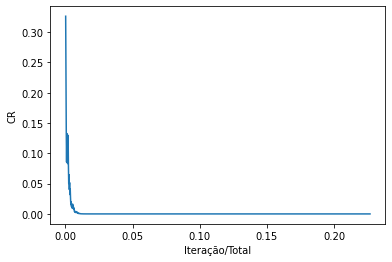

In [31]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

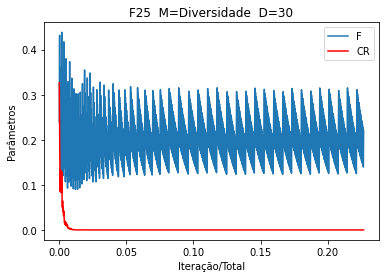

In [32]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'F25_Diversidade_D=30')

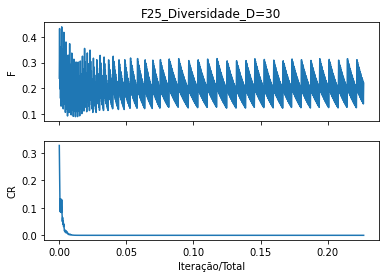

In [33]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [34]:
nome='SUB'+'_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('MCS-FRANNK','Fator F/DE= %.2f' %(fator),'NPAR=',NPAR,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1],'STD __:',STD)
print('MIN __:',MINFO, 'MAX__: ',MAXFO)
print(MEAN[-1])
print(STD)
print(MINFO)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

MCS-FRANNK Fator F/DE= 0.33 NPAR= 100 Iterações= 1000 Dim= 30 Min/Max= -100 / 100 _ F25
SUB_Fo-0.5_CRo-0.5_D-30_Interv-1000 

MÉDIA:  2864.505646504933 STD __: 109.96637386763445
MIN __: 2776.365563844583 MAX__:  3279.8705136038743
2864.505646504933
109.96637386763445
2776.365563844583
Tempo Médio= 162.175 segundos ---
50 Rodadas

BEST:  [-100.         -100.         -100.         -100.         -100.
 -100.         -100.         -100.         -100.         -100.
  -99.55763193 -100.         -100.         -100.         -100.
  100.          100.         -100.         -100.         -100.
 -100.         -100.         -100.         -100.         -100.
 -100.          100.         -100.         -100.          100.
 2776.36556384]
